In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import f
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import statistics
from sklearn.preprocessing import MinMaxScaler

## Creating the clustering model

In [7]:
# Importing the clustering dataset
df = pd.read_csv(
    "C:\\Users\\adity\\Documents\\Winter Semester'22 Courses MMA McGill\\Enterprise Data Science\\Group Project\\clustering_df.csv")

In [29]:
df.head()

,Unnamed: 0,store_nbr,BABY CARE,BEVERAGES,BOOKS,BREAD/BAKERY,CLEANING,DAIRY,DELI,FROZEN FOODS,...,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEATS,OTHER,PERSONAL CARE,POULTRY,PRODUCE,transactions,total_sales,assigned_cluster
0,0,1,0.000000,18.902748,0.001492,4.029323,7.624483,7.453233,1.463511,1.540569,...,0.107227,1.202565,3.729644,3.706572,1.537917,3.383659,17.271545,2553963,1.414660e+07,0
1,1,2,0.000389,19.260932,0.001108,4.285650,7.539144,6.662193,1.907932,1.254980,...,0.064282,0.675594,3.940995,3.283531,2.059788,3.799749,12.898353,3219901,2.156755e+07,3
2,2,3,0.001331,22.487688,0.001070,3.837526,6.882394,6.807689,1.316565,1.498906,...,0.081837,0.732337,2.706705,3.994024,1.679733,3.773844,17.061038,5366350,5.048553e+07,0
3,3,4,0.000127,19.400316,0.001407,3.611438,7.878741,7.028889,1.923636,1.341576,...,0.083385,0.740429,3.291591,3.216057,2.030527,3.997834,13.958046,2519007,1.891105e+07,3
4,4,5,0.001379,16.251393,0.001475,4.122759,10.695893,5.587790,2.663210,1.729505,...,0.031874,0.708336,3.059760,3.369688,2.887050,2.691282,10.604885,2347877,1.559287e+07,2


In [8]:
# Dropping store_nbr
clustering_df = df.drop(columns= 'store_nbr')

In [9]:
clustering_df.head()

,Unnamed: 0,BABY CARE,BEVERAGES,BOOKS,BREAD/BAKERY,CLEANING,DAIRY,DELI,FROZEN FOODS,GROCERIES,...,LADIESWEAR,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEATS,OTHER,PERSONAL CARE,POULTRY,PRODUCE,transactions,total_sales
0,0,0.000000,18.902748,0.001492,4.029323,7.624483,7.453233,1.463511,1.540569,26.730029,...,0.112006,0.107227,1.202565,3.729644,3.706572,1.537917,3.383659,17.271545,2553963,1.414660e+07
1,1,0.000389,19.260932,0.001108,4.285650,7.539144,6.662193,1.907932,1.254980,30.841461,...,0.137011,0.064282,0.675594,3.940995,3.283531,2.059788,3.799749,12.898353,3219901,2.156755e+07
2,2,0.001331,22.487688,0.001070,3.837526,6.882394,6.807689,1.316565,1.498906,25.952200,...,0.103020,0.081837,0.732337,2.706705,3.994024,1.679733,3.773844,17.061038,5366350,5.048553e+07
3,3,0.000127,19.400316,0.001407,3.611438,7.878741,7.028889,1.923636,1.341576,29.991410,...,0.135344,0.083385,0.740429,3.291591,3.216057,2.030527,3.997834,13.958046,2519007,1.891105e+07
4,4,0.001379,16.251393,0.001475,4.122759,10.695893,5.587790,2.663210,1.729505,33.964111,...,0.095037,0.031874,0.708336,3.059760,3.369688,2.887050,2.691282,10.604885,2347877,1.559287e+07


In [10]:
clustering_df.columns

Index(['Unnamed: 0', 'BABY CARE', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
       'CLEANING', 'DAIRY', 'DELI', 'FROZEN FOODS', 'GROCERIES', 'HOME CARE',
       'LADIESWEAR', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER', 'MEATS', 'OTHER',
       'PERSONAL CARE', 'POULTRY', 'PRODUCE', 'transactions', 'total_sales'],
      dtype='object')

In [11]:
# Standardizing the transactions and total_sales columns
scaler = MinMaxScaler()
clustering_df['transactions'] = scaler.fit_transform(clustering_df[['transactions']])
clustering_df['total_sales'] = scaler.fit_transform(clustering_df[['total_sales']])

In [12]:
# Choosing the variables
X = clustering_df[['CLEANING', 
                      'DAIRY', 
                      'GROCERIES',
                      'PRODUCE', 
                   'POULTRY',
                  'FROZEN FOODS',
                  'DELI',
                  'BREAD/BAKERY',
                  'total_sales',
                  'OTHER']]

In [13]:
# Storing the list of variable selected to later name the columns of the dataframe that contains the cluster centers
X_cols = list(X.columns)

In [14]:
X_cols

['CLEANING',
 'DAIRY',
 'GROCERIES',
 'PRODUCE',
 'POULTRY',
 'FROZEN FOODS',
 'DELI',
 'BREAD/BAKERY',
 'total_sales',
 'OTHER']

In [15]:
# Creating a loop to vary 'k' in order to plot the elbow and silhouette plot and select the optimal no. of clusters
list_base_model = []
withinss=[]
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    model = kmeans.fit(X)
    labels = model.labels_
    withinss.append(model.inertia_)
    silhouette = silhouette_score(X, labels)
    list_base_model.append(silhouette)

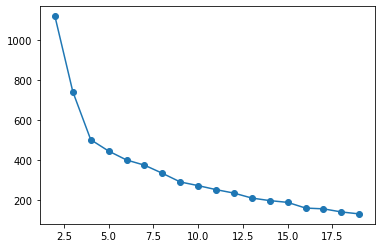

In [16]:
# Elbow curve
pyplot.plot(list(range(2,20)), withinss, marker= 'o')

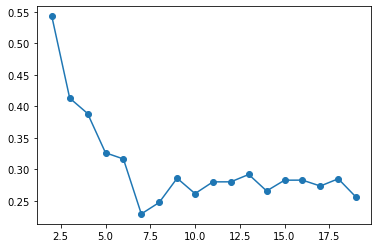

In [17]:
# Silhouette plot
pyplot.plot(list(range(2,20)), list_base_model, marker= 'o')

In [18]:
# Running the final K means model with k=4
kmeans = KMeans(n_clusters=4, random_state=0)
model = kmeans.fit(X)
labels = model.labels_

In [19]:
labels

array([0, 3, 0, 3, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 2, 2,
       3, 0, 0, 2, 3, 2, 3, 2, 2, 1, 2, 2, 1, 2, 3, 3, 2, 1, 3, 0, 2, 0,
       3, 2, 3, 2, 0, 2, 0, 0, 0, 1])

In [20]:
silhouette_sam = silhouette_samples(X, labels)

In [21]:
df_100 = pd.DataFrame({'label':labels,'silhouette':silhouette_sam})
print('Average Silhouette Score for Cluster 0: ',np.average(df_100[df_100['label'] == 0].silhouette))
print('Average Silhouette Score for Cluster 1: ',np.average(df_100[df_100['label'] == 1].silhouette))
print('Average Silhouette Score for Cluster 2: ',np.average(df_100[df_100['label'] == 2].silhouette))
print('Average Silhouette Score for Cluster 3: ',np.average(df_100[df_100['label'] == 3].silhouette))

Average Silhouette Score for Cluster 0:  0.4545607469585627
Average Silhouette Score for Cluster 1:  0.3796855108897808
Average Silhouette Score for Cluster 2:  0.3424330856745849
Average Silhouette Score for Cluster 3:  0.3978262788641995


In [22]:
# Creating a dataframe to store the cluster centers
cluster_centers_df = pd.DataFrame(model.cluster_centers_)

In [ ]:
# get user input

new_store = ['var1', 'var2', ...]

new_store_label = kmeans.predict(new_store)

In [23]:
cluster_centers_df.head()

,0,1,2,3,4,5,6,7,8,9
0,7.294575,6.933849,26.201392,17.741551,3.101632,1.623020,1.543567,4.153675,0.401562,3.442029
1,12.980762,4.114802,40.168883,4.344722,1.951110,0.758441,3.074439,2.830805,0.181907,2.726081
2,10.149108,5.177100,35.661281,7.751819,2.361975,1.141064,2.698875,3.995167,0.252607,2.964175
3,8.224776,6.664833,30.941779,12.669227,3.073377,1.425532,2.033831,4.639711,0.345740,3.140290


In [ ]:
# radar plot: https://www.cs.middlebury.edu/~candrews/showcase/infovis_techniques_s16/radar_chart/chart.png

# t-SNE : https://miro.medium.com/max/701/1*6j41Z2p5MW-YlzwBcjpG1Q.png

In [24]:
cluster_centers_df.columns = X_cols

In [25]:
cluster_centers_df.head()

,CLEANING,DAIRY,GROCERIES,PRODUCE,POULTRY,FROZEN FOODS,DELI,BREAD/BAKERY,total_sales,OTHER
0,7.294575,6.933849,26.201392,17.741551,3.101632,1.623020,1.543567,4.153675,0.401562,3.442029
1,12.980762,4.114802,40.168883,4.344722,1.951110,0.758441,3.074439,2.830805,0.181907,2.726081
2,10.149108,5.177100,35.661281,7.751819,2.361975,1.141064,2.698875,3.995167,0.252607,2.964175
3,8.224776,6.664833,30.941779,12.669227,3.073377,1.425532,2.033831,4.639711,0.345740,3.140290


In [27]:
# Adding the clusters column to our original dataframe
df['assigned_cluster'] = labels

In [28]:
df.head()

,Unnamed: 0,store_nbr,BABY CARE,BEVERAGES,BOOKS,BREAD/BAKERY,CLEANING,DAIRY,DELI,FROZEN FOODS,...,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEATS,OTHER,PERSONAL CARE,POULTRY,PRODUCE,transactions,total_sales,assigned_cluster
0,0,1,0.000000,18.902748,0.001492,4.029323,7.624483,7.453233,1.463511,1.540569,...,0.107227,1.202565,3.729644,3.706572,1.537917,3.383659,17.271545,2553963,1.414660e+07,0
1,1,2,0.000389,19.260932,0.001108,4.285650,7.539144,6.662193,1.907932,1.254980,...,0.064282,0.675594,3.940995,3.283531,2.059788,3.799749,12.898353,3219901,2.156755e+07,3
2,2,3,0.001331,22.487688,0.001070,3.837526,6.882394,6.807689,1.316565,1.498906,...,0.081837,0.732337,2.706705,3.994024,1.679733,3.773844,17.061038,5366350,5.048553e+07,0
3,3,4,0.000127,19.400316,0.001407,3.611438,7.878741,7.028889,1.923636,1.341576,...,0.083385,0.740429,3.291591,3.216057,2.030527,3.997834,13.958046,2519007,1.891105e+07,3
4,4,5,0.001379,16.251393,0.001475,4.122759,10.695893,5.587790,2.663210,1.729505,...,0.031874,0.708336,3.059760,3.369688,2.887050,2.691282,10.604885,2347877,1.559287e+07,2
